<a href="https://colab.research.google.com/github/amey-joshi/am/blob/master/fdtd/em_simulation_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1.3 from the book **Electromagnetic Simulation Using the FDTD Method with Python** by **Houle, Jennifer E and Sullivan, Dennis M**, published by John Wiley & Sons in 2020.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Parameters of the problem.
ke = 200

ex = np.zeros(ke)
hy = np.zeros(ke)

kc = ke//2
t0 = 40
spread = 12

# Artifacts for an absorbing boundary condition.
low_boundary = [0, 0]
high_boundary = [0, 0]

# Dictionaries to save electric field data for plotting
save_steps = [100, 225, 250]
plotting_data = [
  {'nsteps': 100, 'ex_data': None, 'label': ''},
  {'nsteps': 225, 'ex_data': None, 'label': ''},
  {'nsteps': 250, 'ex_data': None, 'label': 'FDTD cells'}
]

nsteps = 250

In [26]:
# Functions used in the simulation

def reset_fields():
  ex[:] = 0
  hy[:] = 0
  low_boundary[:] = 0
  high_boundary[:] = 0

def compute_fields():
  for k in range(1, ke):
    ex[k] += 0.5 * (hy[k-1] - hy[k])

  ex[kc] = np.exp(-0.5 * ((t - t0)/spread)**2)
  
  # Update the boundary values
  ex[0] = low_boundary.pop(0)
  low_boundary.append(ex[1])

  ex[ke-1] = high_boundary.pop(0)
  high_boundary.append(ex[ke-2])

  for k in range(ke - 1):
    hy[k] += 0.5 * (ex[k] - ex[k+1])

def plot_e_field(data, timestep, label):
  """Plot of E field at a single time step"""
  plt.plot(data, color='k', linewidth=1)
  plt.ylabel('E$_x$', fontsize='14')
  plt.xticks(np.arange(0, 199, step=20))
  plt.xlim(0, 199)
  plt.yticks(np.arange(0, 1.2, step=1))
  plt.ylim(-0.2, 1.2)
  plt.text(100, 0.5, f'T = {timestep}', horizontalalignment='center')
  plt.xlabel(f'{label}')


In [27]:
reset_fields()

index = 0
for t in range(nsteps + 1):
  compute_fields()

  if t in save_steps:
    d = plotting_data[index]
    d['ex_data'] = np.copy(ex)
    index += 1

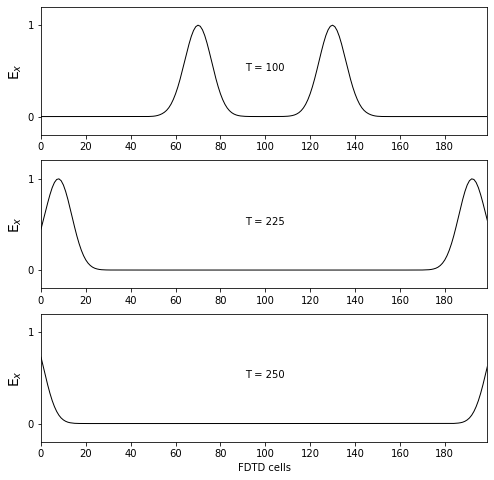

In [29]:
fig = plt.figure(figsize=(8, 8))
for sno, d in enumerate(plotting_data):
  ax = fig.add_subplot(len(plotting_data), 1, sno + 1)
  plot_e_field(d['ex_data'], d['nsteps'], d['label'])
